In [1]:
import cfgrib
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

from baselines.data_processor import DataProcessor
from baselines.linear_reg.linear_regressor import LinearRegressor

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [2]:
data, feature_list = DataProcessor.load_data()
s = 3
fh = 2

processor = DataProcessor(data)
X, y = processor.preprocess(s, fh, use_neighbours=False)
X_train, X_test, y_train, y_test = processor.train_test_split(X, y)

In [3]:
X.shape, y.shape

((2916, 25, 45, 3, 6), (2916, 25, 45, 2, 6))

<LINEAR>
t2m => RMSE:  1.28256; SE: 0.05107382193599675
tcc => RMSE:  2.30253; SE: 0.39043238579223727
u10 => RMSE:  0.20059; SE: 0.0012774946971840027
v10 => RMSE:  1.53303; SE: 0.02999503467663981
tp => RMSE:  1.93185; SE: 0.02674415314999382
sp => RMSE:  0.00015; SE: 3.190123789037183e-06


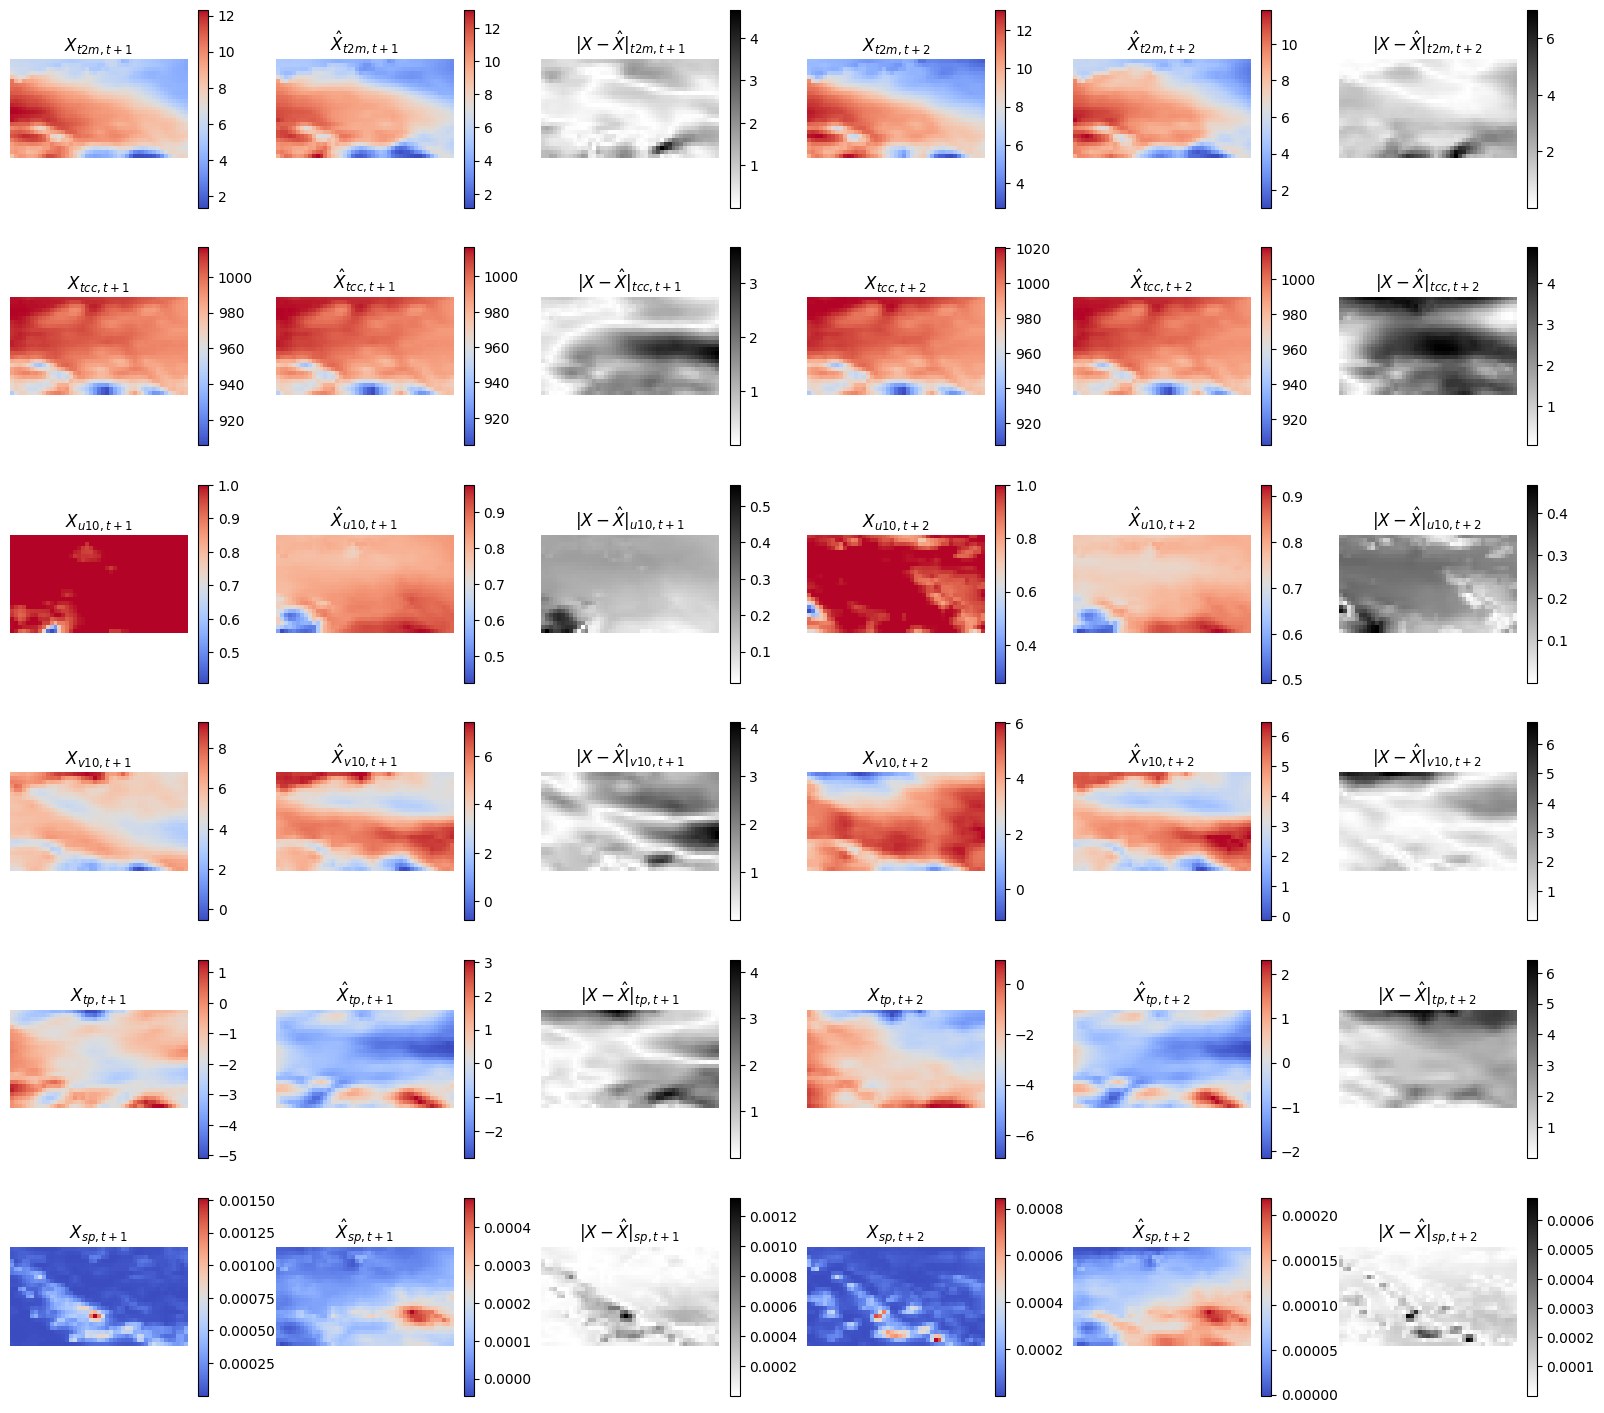

Evaluation metrics for entire test set:
t2m => RMSE: 2.895; SE: 0.004622528557599638
tcc => RMSE: 2.419; SE: 0.011650039652808765
u10 => RMSE: 0.311; SE: 0.00020160681976281122
v10 => RMSE: 1.799; SE: 0.00173407108057958
tp => RMSE: 1.788; SE: 0.0014322600082531719
sp => RMSE: 0.0; SE: 1.5908941072379268e-07


 47.379486083984375 [S]


In [4]:
from time import time 
start = time()

available_reg = ['linear']
for reg in available_reg:
    print(f'<{reg.upper()}>')
    linearreg = LinearRegressor(X.shape, fh, feature_list, regressor_type=reg)
    linearreg.train(X_train, y_train)
    _ = linearreg.predict_and_evaluate(X_test, y_test, max_samples=1)
    print()
    
stop = time()
print('\n', stop-start, '[S]')